In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import csv
import os
from itertools import islice
import re
from collections import Counter

In [ ]:
comments_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\01_Data_Extraction\\Data\\Comments", "comments_final.csv")

df_comments = pd.read_csv(comments_path)

df_comments.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı
0,17 Şubat 2025,Boy: 168cm,Kilo: 55kg,Beden: S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
1,14 Şubat 2025,Boy: 165cm,Kilo: 59kg,Beden: S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
2,23 Aralık 2024,Boy: 168cm,Kilo: 60kg,Beden: S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,Beden: M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
4,01 Şubat 2025,Boy: 157cm,Kilo: 46kg,Beden: S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...


In [4]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481766 entries, 0 to 481765
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Tarih     481755 non-null  object
 1   Boy       481761 non-null  object
 2   Kilo      481762 non-null  object
 3   Beden     481764 non-null  object
 4   Yorum     481766 non-null  object
 5   Ürün Adı  481766 non-null  object
dtypes: object(6)
memory usage: 22.1+ MB


In [5]:
df_comments["Ürün Adı"].unique()

array(['TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097',
       'TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097',
       'TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643',
       ...,
       'TRENDYOLMİLLA Ekru Maxi Dokuma Büzgülü Sırt Dekolteli Plaj Elbisesi TBESS23EL00063',
       'TRENDYOLMİLLA Kırmızı Düz Kesim Düğme Detaylı Bisiklet Yaka Mini Dokuma Elbise TWOSS24EL00704',
       'Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214'],
      dtype=object)

1- Temizlik: Çoklayan Satırları Silmek

In [6]:
df_cleaned_v1 = df_comments.drop_duplicates(subset="Yorum",keep="first").reset_index(drop=True)
df_cleaned_v1.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı
0,17 Şubat 2025,Boy: 168cm,Kilo: 55kg,Beden: S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
1,14 Şubat 2025,Boy: 165cm,Kilo: 59kg,Beden: S,Boyum 1.65 bi tik daha uzun olsa elbise iyi ol...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
2,23 Aralık 2024,Boy: 168cm,Kilo: 60kg,Beden: S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,Beden: M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
4,01 Şubat 2025,Boy: 157cm,Kilo: 46kg,Beden: S,Xs uzun süredir gelmediği için s aldım 157*46 ...,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...


In [7]:
df_cleaned_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109183 entries, 0 to 109182
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Tarih     109174 non-null  object
 1   Boy       109179 non-null  object
 2   Kilo      109180 non-null  object
 3   Beden     109182 non-null  object
 4   Yorum     109183 non-null  object
 5   Ürün Adı  109183 non-null  object
dtypes: object(6)
memory usage: 5.0+ MB


2- Temizlik: Metin Uzunlukları Kontrol

In [8]:
max_lengt = df_cleaned_v1["Yorum"].str.len().max()
min_lengt = df_cleaned_v1["Yorum"].str.len().min()

print("Max Length: ", max_lengt)
print("Min Length: ", min_lengt)

Max Length:  363
Min Length:  2


In [9]:
shortest_comments = df_cleaned_v1[df_cleaned_v1["Yorum"].str.len() == 2]["Yorum"]
print(shortest_comments)
## Metinlerde emoji var, silinmesi gerekiyor

42894    👍🏻
Name: Yorum, dtype: object


In [ ]:
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None)  

In [ ]:
longest_comments = df_cleaned_v1[df_cleaned_v1["Yorum"].str.len() == 363]["Yorum"]
print(longest_comments)

273       Boyum 167 kilom 65.5 civarı normalde milladan elbiselerimi m beden alırdım ama yorumlarda alt kısmı dar olduğu söylendiği için l beden aldım bu sefer benim göbeğim ve basenim fazla olmasına rağmen alt kısmı bol oldu aşırı bol bi görüntü yok ama basen kısmında boşluk görünüyor kendi bedeninizi alın çünkü benim üstüme oturmadı ama acil lazım olduğu i\nDevamını Oku
514       Plaj elbisesi denmis ama bence günlük hayatta kullanilacak cok guzel bir elbise. Ben 8 aylik hamileyim, 167 boyum, 78 kiloyum 40 beden aldim göğüslerim biraz fazla büyüdüğü icin kasmasın diye, göbeğim dev gibi büyümedi 38 de alsam olurmus ama viskon kumas bir tık toplar ceker diye buyuk aldim memmun kaldim. Bence mükemmel ustumde yok gibi bir elbis\nDevamını Oku
528       Urun ic gostermiyor. Vucuda yapisan cok guzel elbise. Ben cok begendim. Kusursuz bi goruntu istiyosaniz altina lazer kesim korse giyebilirsiniz. Ben oyle tercih ettim. Ic gosterdiginden degil, korse vucudu daha guzel daha sekilli gosteriyor

In [12]:
df_cleaned_v1["Yorum_V1"] = df_cleaned_v1["Yorum"].apply(lambda x: emoji.replace_emoji(str(x),replace=""))

In [13]:
df_cleaned_v1.tail()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1
109178,19 Ocak 2025,Boy: 172cm,Kilo: 80kg,Beden: 46,Beğendim ama kol oyuncusu daha yerinde olabilirdi,Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,Beğendim ama kol oyuncusu daha yerinde olabilirdi
109179,26 Temmuz 2024,Boy: 166cm,Kilo: 80kg,Beden: 48,Mezuniyetim için aldım çok güzel oldu çok beğendim kalıbı tam kalıp kumaşı biraz kalın ama asla terletmiyor dün kullandım hava sıcaktı asla bunaltmadı çok zayıf gösteriyor basen göğüs bölgesi pot oluyor diyen olmuş bende öyle bir sorun olmadı vücut tipiyle alakalı bir durum bence.,Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,Mezuniyetim için aldım çok güzel oldu çok beğendim kalıbı tam kalıp kumaşı biraz kalın ama asla terletmiyor dün kullandım hava sıcaktı asla bunaltmadı çok zayıf gösteriyor basen göğüs bölgesi pot oluyor diyen olmuş bende öyle bir sorun olmadı vücut tipiyle alakalı bir durum bence.
109180,24 Temmuz 2024,Boy: 160cm,Kilo: 77kg,Beden: 44,elbise çok güzel şık ama dikiş hataları var ayrıca basen ve koltuk altı kısmında potluk var. 163 boy 79.kilo 44 beden aldım biraz bol oldu geniş kesim. boyu da dizin çok altında,Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,elbise çok güzel şık ama dikiş hataları var ayrıca basen ve koltuk altı kısmında potluk var. 163 boy 79.kilo 44 beden aldım biraz bol oldu geniş kesim. boyu da dizin çok altında
109181,23 Temmuz 2024,Bilgi mevcut değil,Bilgi mevcut değil,Beden: 48,Aşırı güzel kızlar göbek kalça basen asla asla göstermiyor çok beğendim,Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,Aşırı güzel kızlar göbek kalça basen asla asla göstermiyor çok beğendim
109182,20 Temmuz 2024,Boy: 175cm,Kilo: 90kg,Beden: 44,"Kalıbı, boyu kumaşı harika 🥰 çok şık zarif bir elbise mutlaka alınması gerekiyor",Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,"Kalıbı, boyu kumaşı harika çok şık zarif bir elbise mutlaka alınması gerekiyor"


In [14]:
min_lengt = df_cleaned_v1["Yorum_V1"].str.len().min()
print(min_lengt)

0


In [ ]:
df_cleaned_v2 = df_cleaned_v1[df_cleaned_v1["Yorum_V1"].str.len() > 1].reset_index(drop=True)

df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1
0,17 Şubat 2025,Boy: 168cm,Kilo: 55kg,Beden: S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu"
1,14 Şubat 2025,Boy: 165cm,Kilo: 59kg,Beden: S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum
2,23 Aralık 2024,Boy: 168cm,Kilo: 60kg,Beden: S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,Beden: M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık"
4,01 Şubat 2025,Boy: 157cm,Kilo: 46kg,Beden: S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.


In [16]:
min_lengt = df_cleaned_v2["Yorum_V1"].str.len().min()
print(min_lengt)

3


In [17]:
shortest_comments = df_cleaned_v1[df_cleaned_v1["Yorum_V1"].str.len() == min_lengt]["Yorum_V1"]
print(shortest_comments)

9962     iyi
11428    İyi
37064    şık
69832    Fav
Name: Yorum_V1, dtype: object


In [18]:
df_cleaned_v2["Yorum_V1"] = df_cleaned_v2["Yorum_V1"].str.replace(r'\nDevamını Oku','',regex=True) 
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1
0,17 Şubat 2025,Boy: 168cm,Kilo: 55kg,Beden: S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu"
1,14 Şubat 2025,Boy: 165cm,Kilo: 59kg,Beden: S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum
2,23 Aralık 2024,Boy: 168cm,Kilo: 60kg,Beden: S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,Beden: M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık"
4,01 Şubat 2025,Boy: 157cm,Kilo: 46kg,Beden: S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.


In [19]:
max_lengt = df_cleaned_v2["Yorum_V1"].str.len().max()
print(max_lengt)

350


In [20]:
longest_comments = df_cleaned_v2[df_cleaned_v2["Yorum_V1"].str.len() == max_lengt]["Yorum_V1"]
print(longest_comments)

113       kizlaaaar bayildim valla cok iyi ben 170 59 kiloyum L beden aldım çok fazla yapismamasi icin tabii bir tık azıcık kollarda omuz kısmında bolluk oldu ama sorun değil, M beden alsaydim tam cuk otururdu ama ben böyle daha çok sevdim. boyu da tam tam oldu hatta birazcik uzun bile ama topuklu giyinsem tam olur. üzerine gömlekle vs harika oluyor bayildim
273       Boyum 167 kilom 65.5 civarı normalde milladan elbiselerimi m beden alırdım ama yorumlarda alt kısmı dar olduğu söylendiği için l beden aldım bu sefer benim göbeğim ve basenim fazla olmasına rağmen alt kısmı bol oldu aşırı bol bi görüntü yok ama basen kısmında boşluk görünüyor kendi bedeninizi alın çünkü benim üstüme oturmadı ama acil lazım olduğu i
514       Plaj elbisesi denmis ama bence günlük hayatta kullanilacak cok guzel bir elbise. Ben 8 aylik hamileyim, 167 boyum, 78 kiloyum 40 beden aldim göğüslerim biraz fazla büyüdüğü icin kasmasın diye, göbeğim dev gibi büyümedi 38 de alsam olurmus ama viskon kumas bir tık topl

In [21]:
df_cleaned_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109142 entries, 0 to 109141
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Tarih     109133 non-null  object
 1   Boy       109138 non-null  object
 2   Kilo      109139 non-null  object
 3   Beden     109141 non-null  object
 4   Yorum     109142 non-null  object
 5   Ürün Adı  109142 non-null  object
 6   Yorum_V1  109142 non-null  object
dtypes: object(7)
memory usage: 5.8+ MB


In [22]:
df_cleaned_v2["Ürün Adı"].unique()

array(['TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097',
       'TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda Oturan Bisiklet Yaka Esnek Örme Maxi Kalem Elbise TWOSS24EL00097',
       'TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Gömlek Elbise TWOAW23EL00643',
       ...,
       'TRENDYOLMİLLA Ekru Maxi Dokuma Büzgülü Sırt Dekolteli Plaj Elbisesi TBESS23EL00063',
       'TRENDYOLMİLLA Kırmızı Düz Kesim Düğme Detaylı Bisiklet Yaka Mini Dokuma Elbise TWOSS24EL00704',
       'Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214'],
      dtype=object)

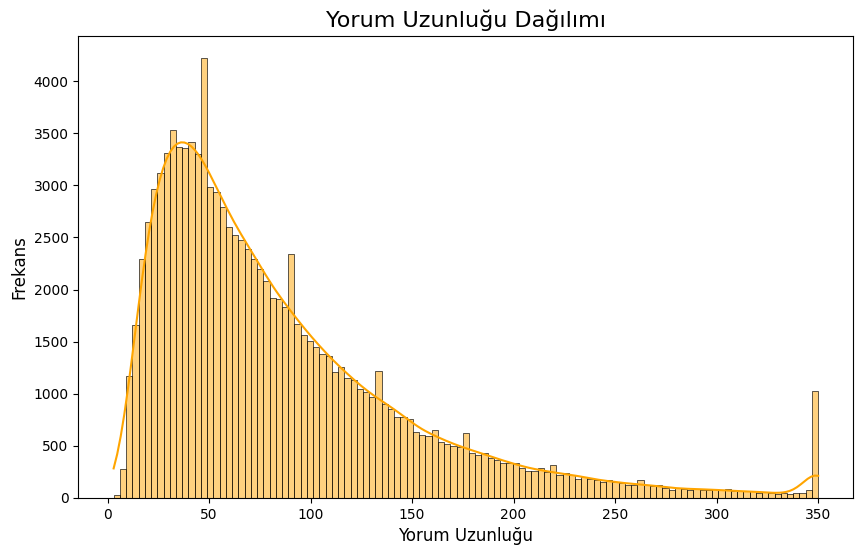

In [ ]:
df_cleaned_v2['Yorum Uzunluğu'] = df_cleaned_v2['Yorum_V1'].str.len()

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned_v2['Yorum Uzunluğu'], kde=True, color='orange')

plt.title('Yorum Uzunluğu Dağılımı', fontsize=16)
plt.xlabel('Yorum Uzunluğu', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

plt.show()


C:\Users\SILA\AppData\Local\Temp\ipykernel_3168\2463524302.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='Oranges_r')


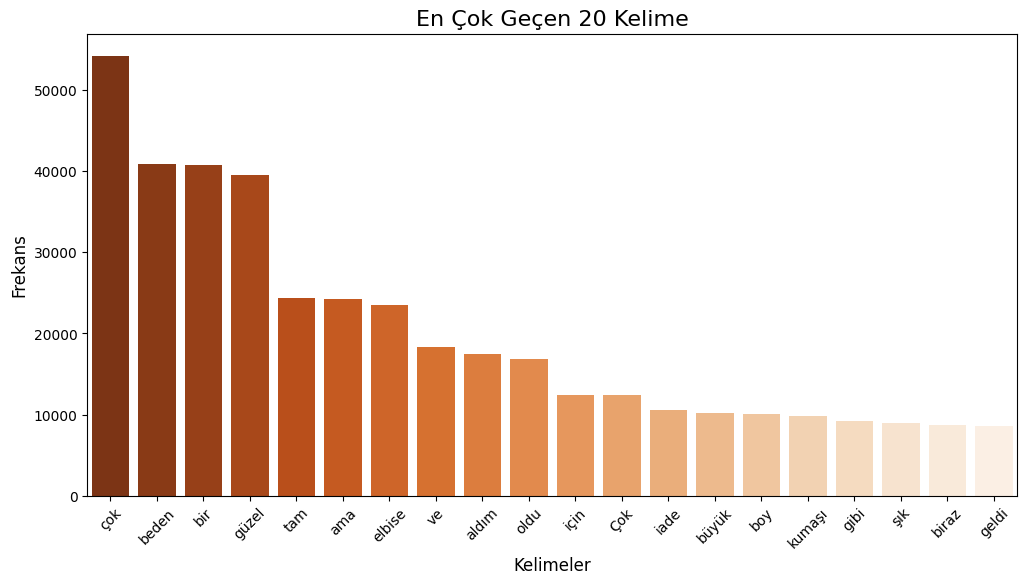

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna())   

words = all_text.split()
word_counts = Counter(words)

most_common_words = word_counts.most_common(20)

words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='Oranges_r')

plt.title("En Çok Geçen 20 Kelime", fontsize=16)
plt.xlabel("Kelimeler", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)  

plt.show()


C:\Users\SILA\AppData\Local\Temp\ipykernel_3168\462874929.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bigram_labels, y=bigram_values, palette="Oranges_r")


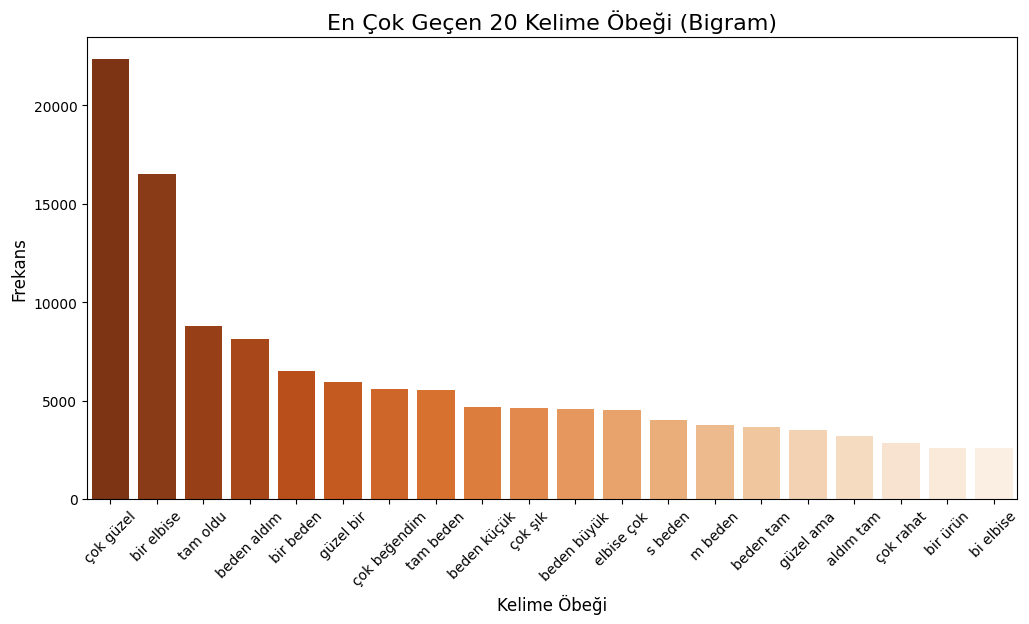

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna())

all_text_cleaned = re.sub(r'[^\w\s]', '', all_text).lower()

words = all_text_cleaned.split()
bigrams = list(zip(words, islice(words, 1, None))) 

bigram_counts = Counter(bigrams)

most_common_bigrams = bigram_counts.most_common(20)

bigram_labels, bigram_values = zip(*most_common_bigrams)
bigram_labels = [" ".join(b) for b in bigram_labels]  

plt.figure(figsize=(12, 6))
sns.barplot(x=bigram_labels, y=bigram_values, palette="Oranges_r")

plt.title("En Çok Geçen 20 Kelime Öbeği (Bigram)", fontsize=16)
plt.xlabel("Kelime Öbeği", fontsize=12)
plt.ylabel("Frekans", fontsize=12)
plt.xticks(rotation=45)

plt.show()


Beden kelimesinden sonra gelen ilk 20 kelime:
aldım: 7052
küçük: 4660
büyük: 4549
tam: 3662
alın: 928
aldım.: 898
çok: 883
alabilirsiniz: 826
aldim: 687
tercih: 626
sipariş: 589
giyiyorum: 582
olarak: 428
alınabilir: 365
oldu: 363
almıştım: 352
alınmalı: 338
buyuk: 324
de: 295
kucuk: 272


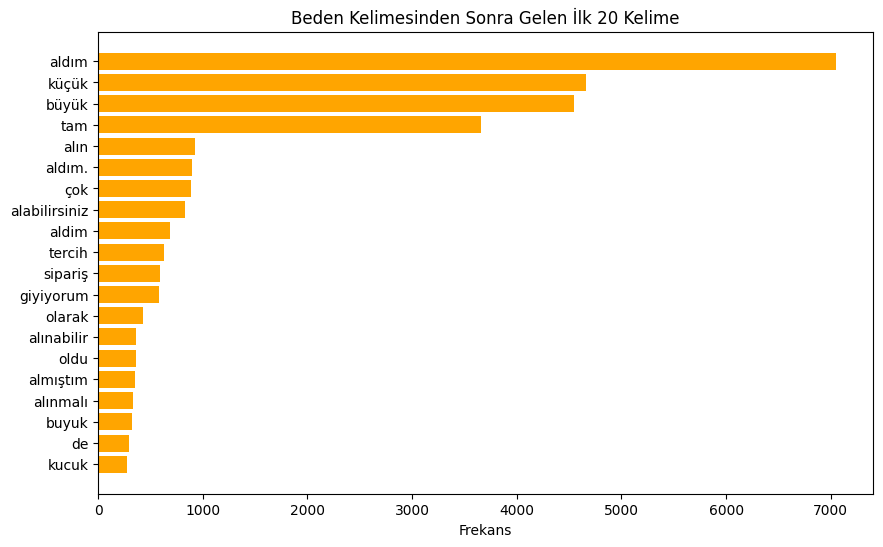

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna())  

words = all_text.split()

words = [word.lower() for word in words]

words_after_beden = []
for i in range(1, len(words)):
    if words[i-1] == "beden":  
        words_after_beden.append(words[i]) 

word_counts_after_beden = Counter(words_after_beden)
most_common_after_beden = word_counts_after_beden.most_common(20)

print("Beden kelimesinden sonra gelen ilk 20 kelime:")
for word, count in most_common_after_beden:
    print(f"{word}: {count}")

words, counts = zip(*most_common_after_beden)  
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frekans')
plt.title('Beden Kelimesinden Sonra Gelen İlk 20 Kelime')
plt.gca().invert_yaxis()
plt.show()


Beden kelimesinden önce gelen ilk 20 kelime:
bir: 6497
tam: 5280
s: 3984
m: 3739
38: 2056
36: 1964
l: 1946
1: 1885
40: 1722
34: 1712
42: 1238
bi: 814
46: 770
2: 582
44: 569
büyük: 520
48: 498
küçük: 495
50: 403
iki: 362


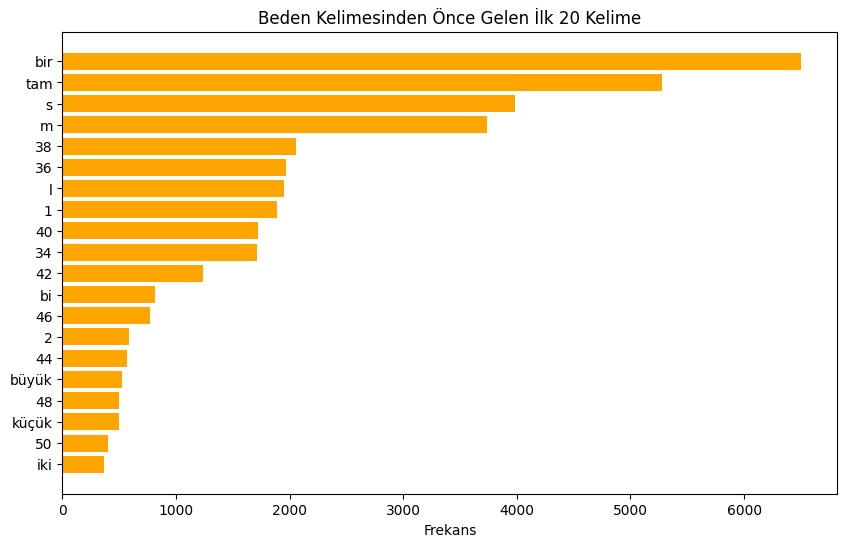

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna()) 

words = all_text.split()

words = [word.lower() for word in words]

words_after_beden = []
for i in range(1, len(words)):
    if words[i] == "beden":  
        words_after_beden.append(words[i-1])  

word_counts_after_beden = Counter(words_after_beden)
most_common_after_beden = word_counts_after_beden.most_common(20)

print("Beden kelimesinden önce gelen ilk 20 kelime:")
for word, count in most_common_after_beden:
    print(f"{word}: {count}")

words, counts = zip(*most_common_after_beden) 
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frekans')
plt.title('Beden Kelimesinden Önce Gelen İlk 20 Kelime')
plt.gca().invert_yaxis() 
plt.show()


Bi kelimesinden sonra gelen ilk 20 kelime:
elbise: 2298
beden: 814
tık: 709
ürün: 294
parça: 222
elbise.: 212
kumaşı: 202
kumaş: 157
elbise,: 70
tik: 69
küçük: 67
de: 50
model: 43
garip: 41
şekilde: 39
yapısı: 36
tuhaf: 30
kaç: 30
sorun: 29
potluk: 28


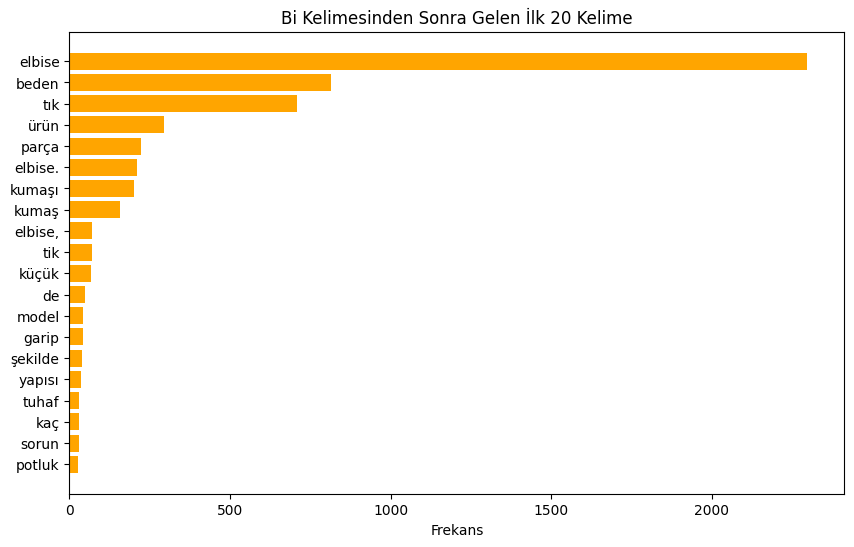

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna())

words = all_text.split()

words = [word.lower() for word in words]

words_after_beden = []
for i in range(1, len(words)):
    if words[i-1] == "bi":  
        words_after_beden.append(words[i])  

word_counts_after_beden = Counter(words_after_beden)
most_common_after_beden = word_counts_after_beden.most_common(20)

print("Bi kelimesinden sonra gelen ilk 20 kelime:")
for word, count in most_common_after_beden:
    print(f"{word}: {count}")

words, counts = zip(*most_common_after_beden)  
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frekans')
plt.title('Bi Kelimesinden Sonra Gelen İlk 20 Kelime')
plt.gca().invert_yaxis()
plt.show()


Çok kelimesinden sonra gelen ilk 20 kelime:
güzel: 20631
beğendim: 4626
şık: 4334
rahat: 2649
iyi: 2278
tatlı: 1343
çok: 1271
hoş: 1231
güzel.: 1118
kaliteli: 1021
kısa: 717
beğendim.: 713
dar: 673
kötü: 654
bol: 640
ince: 604
büyük: 580
güzel,: 542
beğendi: 538
zarif: 512


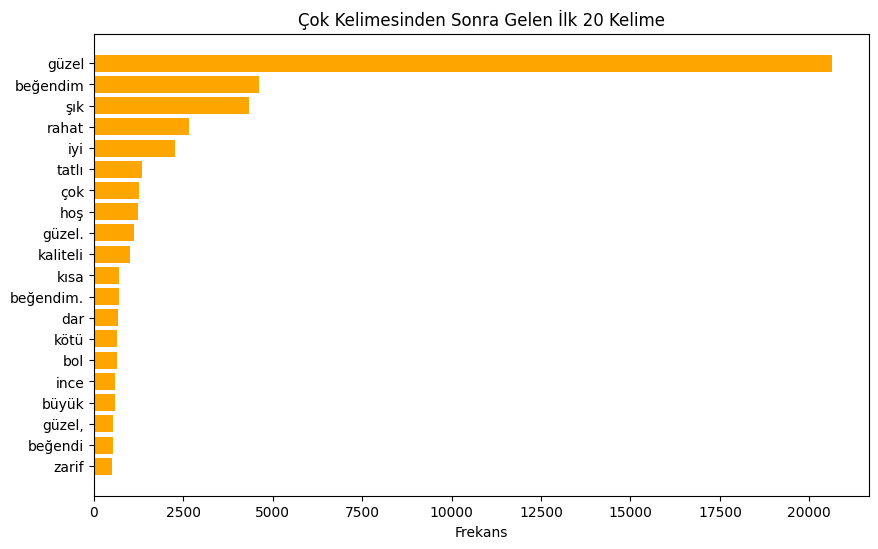

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna())  

words = all_text.split()

words = [word.lower() for word in words]

words_after_beden = []
for i in range(1, len(words)):
    if words[i-1] == "çok":  
        words_after_beden.append(words[i]) 
        
word_counts_after_beden = Counter(words_after_beden)
most_common_after_beden = word_counts_after_beden.most_common(20)

print("Çok kelimesinden sonra gelen ilk 20 kelime:")
for word, count in most_common_after_beden:
    print(f"{word}: {count}")

words, counts = zip(*most_common_after_beden)  
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frekans')
plt.title('Çok Kelimesinden Sonra Gelen İlk 20 Kelime')
plt.gca().invert_yaxis()  
plt.show()


36 kelimesinden sonra gelen ilk 20 kelime:
beden: 1964
aldım: 391
tam: 130
giyiyorum: 117
bedenim: 72
da: 66
sipariş: 64
aldim: 46
bedeni: 45
alsam: 41
bedenini: 33
giyerim: 29
tercih: 26
38: 24
daha: 24
aldım.: 23
sını: 23
bol: 19
almıştım: 19
bile: 18


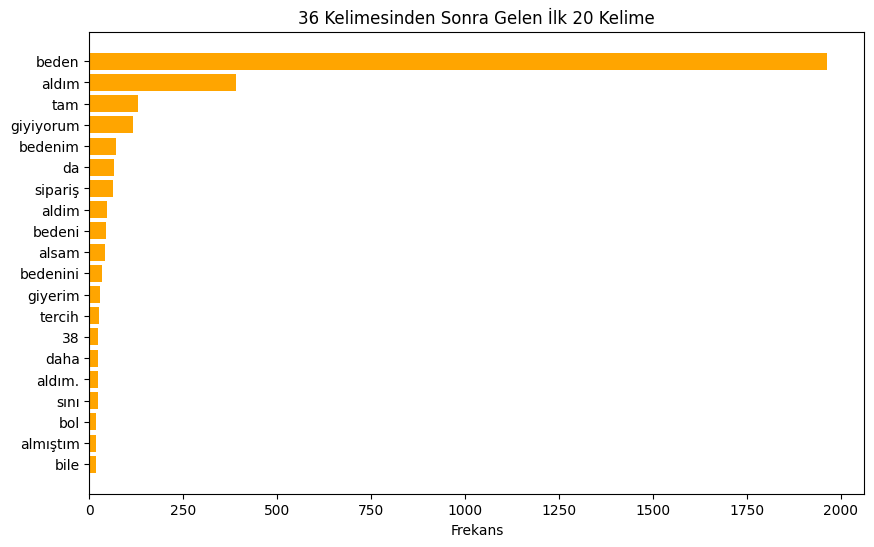

In [ ]:
all_text = " ".join(df_cleaned_v2['Yorum_V1'].dropna()) 

words = all_text.split()

words = [word.lower() for word in words]

words_after_beden = []
for i in range(1, len(words)):
    if words[i-1] == "36":  
        words_after_beden.append(words[i])  
        
word_counts_after_beden = Counter(words_after_beden)
most_common_after_beden = word_counts_after_beden.most_common(20)

print("36 kelimesinden sonra gelen ilk 20 kelime:")
for word, count in most_common_after_beden:
    print(f"{word}: {count}")

words, counts = zip(*most_common_after_beden)  
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='orange')
plt.xlabel('Frekans')
plt.title('36 Kelimesinden Sonra Gelen İlk 20 Kelime')
plt.gca().invert_yaxis()  
plt.show()


3- Temizlik: Bazı Kelime Düzenlemeleri Manuel Yapılır

In [31]:
df_cleaned_v2[df_cleaned_v2['Yorum_V1'].str.contains(r'\bşik\b', na=False )].sample(15, random_state=42)

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu
59390,20 Aralık 2023,Bilgi mevcut değil,Bilgi mevcut değil,Beden: 36,çok şik kalıp güzel,TRENDYOLMİLLA Siyah Vücuda Oturan Dokuma Kısa Şık Abiye Elbise TPRAW24EL00128,çok şik kalıp güzel,19
37235,25 Aralık 2024,Boy: 163cm,Kilo: 58kg,Beden: 38,Normalde 36 giyiyorum ama 1 beden büyük sipariş ettim çok şik oldu,TRENDYOLMİLLA Limited Edition Mavi Gül Detaylı Mini Denim Gömlek Elbise TWOAW25EL00396,Normalde 36 giyiyorum ama 1 beden büyük sipariş ettim çok şik oldu,66
13546,31 Ağustos 2023,Bilgi mevcut değil,Bilgi mevcut değil,Beden: 48,guzel bir elbise duruşuda şik ve rahat kendi bedeninizi ala bilirsiniz ben 46 beden almiştim 42alsam iyi olurmuş kuçultme işlemi yaptirdim,Trendyol Curve Siyah Büyük Beden Astarsız Truvakar Kol Mini Dokuma Ceket Elbise TBBAW23AH00042,guzel bir elbise duruşuda şik ve rahat kendi bedeninizi ala bilirsiniz ben 46 beden almiştim 42alsam iyi olurmuş kuçultme işlemi yaptirdim,138
19910,27 Ağustos 2023,Boy: 165cm,Kilo: 70kg,Beden: 42,Çok şik kalıtelı,TRENDYOLMİLLA Siyah Maxi Dokuma Büzgülü Sırt Dekolteli Plaj Elbisesi TBESS23EL00063,Çok şik kalıtelı,16
73193,09 Haziran 2024,Boy: 164cm,Kilo: 51kg,Beden: 36,Çok güzelde oldu money gözüküyor şik gerçekten fakat Küçük geldi bana iade ettin ve tekrardan büyük bedene alacağım,TRENDYOLMİLLA Siyah Çizgili Midi Dokuma Gömlek Elbise TWOSS24EL00780,Çok güzelde oldu money gözüküyor şik gerçekten fakat Küçük geldi bana iade ettin ve tekrardan büyük bedene alacağım,115
70920,28 Eylül 2023,Boy: 159cm,Kilo: 59kg,Beden: 38,Bakuden siparis etdim. cok guzel . şik elbise. rahat alin aldirin,TRENDYOLMİLLA Siyah Kemerli Mini Dokuma Ceket Elbise TWOAW22EL0243,Bakuden siparis etdim. cok guzel . şik elbise. rahat alin aldirin,65
97737,08 Kasım 2023,Boy: 178cm,Kilo: 68kg,Beden: M,çok şik ve kaliteli,TRENDYOLMİLLA Siyah Tül Astarlı Vücuda Oturan Midi Örme Elbise TWOAW24EL00164,çok şik ve kaliteli,19
14200,31 Temmuz 2023,Bilgi mevcut değil,Bilgi mevcut değil,Bilgi mevcut değil,çok kaliteli ve şik,TRENDYOLMİLLA Siyah Dokuma Elbise,çok kaliteli ve şik,19
103160,06 Kasım 2024,Boy: 166cm,Kilo: 95kg,size: 3XL,elbise güzel ama poşeti acar açmaz ter kokusu evi sardı yani buna neden dikkat edilmiyor koku yüzünden ürünü deneyemedim galiba iade gelen ürün donderildi bana onun daha dikkatli olunmalı onun dışında elbise çok şik,Trendyol Curve Siyah Taşlı Bisiklet Yaka Triko Elbise TBBAW25AH00001,elbise güzel ama poşeti acar açmaz ter kokusu evi sardı yani buna neden dikkat edilmiyor koku yüzünden ürünü deneyemedim galiba iade gelen ürün donderildi bana onun daha dikkatli olunmalı onun dışında elbise çok şik,215
30071,25 Nisan 2023,Bilgi mevcut değil,Bilgi mevcut değil,Bilgi mevcut değil,Bayildim 10 yildiz olsa on yildiz verirdim 74 kilo ya xl tam oldu teseddurlu olduğum için resim paylaşmadim ben yazın sıfır kol olduğu içun kot ceketle giyeceğim çokkk şik gömlekle bile kombınleye bilirsiniz,Trendyol Curve Çok Renkli A-line Çiçek Desenli V Yaka Örme Büyük Beden Elbise TBBSS22AH00010,Bayildim 10 yildiz olsa on yildiz verirdim 74 kilo ya xl tam oldu teseddurlu olduğum için resim paylaşmadim ben yazın sıfır kol olduğu içun kot ceketle giyeceğim çokkk şik gömlekle bile kombınleye bilirsiniz,207


In [32]:
# bi - bir 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbi\b', 'bir', regex=True , case=False)

# kucuk - küçük

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bkucuk\b', 'küçük', regex=True , case=False)

# buyuk - büyük

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbuyuk\b', 'büyük', regex=True , case=False) 

# cok - çok 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bcok\b', 'çok', regex=True , case=False) 

# acik - açık 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bacik\b', 'açık', regex=True , case=False) 

# tik - tık 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\btik\b', 'tık', regex=True , case=False) 

# aldim - aldım 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\baldim\b', 'aldım', regex=True , case=False) 

# begendim - beğendim 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbegendim\b', 'beğendim', regex=True , case=False) 
df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbegendi\b', 'beğendi', regex=True , case=False) 

# genis - geniş 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bgenis\b', 'geniş', regex=True , case=False) 

# birazcik - birazcık 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbirazcik\b', 'birazcık', regex=True , case=False) 

# guzel - güzel 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bguzel\b', 'güzel', regex=True , case=False) 

# bos - boş 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bbos\b', 'boş', regex=True , case=False) 

# gosus - göğüs 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bgogus\b', 'göğüs', regex=True , case=False) 

# ust - üst 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bust\b', 'üst', regex=True , case=False) 

# kalca - kalça 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bkalca\b', 'kalça', regex=True , case=False) 

# asiri - aşırı 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\basiri\b', 'aşırı', regex=True , case=False) 

# şik - şık 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\bşik\b', 'şık', regex=True , case=False) 


# yildiz - yıldız 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\byildiz\b', 'yıldız', regex=True , case=False) 

# urun - ürün 

df_cleaned_v2['Yorum_V1'] = df_cleaned_v2['Yorum_V1'].str.replace(r'\burun\b', 'ürün', regex=True , case=False) 

4- Temizlik:  Beden & Kilo & Boy Bilgisi Konsolide Edilir

In [33]:
size = df_cleaned_v2["Beden"].unique()
size

array(['Beden: S', 'Beden: M', 'Beden: XS', 'Beden: L', 'size: S',
       'size: XL', 'size: M', 'Beden: XL', 'size: L',
       'Bilgi mevcut değil', 'Beden: 2XL', 'size: 2XL', 'Beden: 38',
       'Beden: 42', 'Beden: 40', 'size: 40', 'size: 38', 'Beden: 34',
       'Beden: 36', 'size: 34', 'size: 42', 'size: 36', 'Beden: 32',
       'size: XS', 'Beden: 2XS', 'Beden: 44', 'size: 44', 'Beden: 46',
       'Beden: 48', 'Beden: 52', 'size: 46', 'size: 52', 'size: 50',
       'size: 48', 'Beden: 50', 'Beden: 4XL', 'Beden: 3XL', 'Beden: 5XL',
       'Beden: 6XL', 'size: 3XL', 'size: 5XL', 'Beden: Standart',
       'Beden: 54', 'size: 6XL', 'size: 7XL', 'size: 4XL', 'size: 54',
       'Beden: S/M', nan, 'Beden: 56', 'Beden: 58', 'Beden: 7XL',
       'Beden: XXL', 'Beden: 56/58'], dtype=object)

In [34]:
df_cleaned_v2['Beden'] = df_cleaned_v2['Beden'].fillna("'Bilgi mevcut değil").astype(str).str.replace("Beden: ", "").str.replace("size: ", "")
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu
0,17 Şubat 2025,Boy: 168cm,Kilo: 55kg,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40
1,14 Şubat 2025,Boy: 165cm,Kilo: 59kg,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,134
2,23 Aralık 2024,Boy: 168cm,Kilo: 60kg,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48
4,01 Şubat 2025,Boy: 157cm,Kilo: 46kg,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140


In [35]:
df_cleaned_v2["Beden"].unique()

array(['S', 'M', 'XS', 'L', 'XL', 'Bilgi mevcut değil', '2XL', '38', '42',
       '40', '34', '36', '32', '2XS', '44', '46', '48', '52', '50', '4XL',
       '3XL', '5XL', '6XL', 'Standart', '54', '7XL', 'S/M',
       "'Bilgi mevcut değil", '56', '58', 'XXL', '56/58'], dtype=object)

In [36]:
boy = df_cleaned_v2["Boy"].unique()
boy

array(['Boy: 168cm', 'Boy: 165cm', 'Bilgi mevcut değil', 'Boy: 157cm',
       'Boy: 163cm', 'Boy: 172cm', 'Boy: 170cm', 'Boy: 175cm',
       'Boy: 164cm', 'Boy: 167cm', 'Boy: 173cm', 'Boy: 174cm',
       'Boy: 160cm', 'Boy: 171cm', 'Boy: 154cm', 'Boy: 162cm',
       'Boy: 155cm', 'Boy: 177cm', 'Boy: 166cm', 'Boy: 158cm',
       'Boy: 176cm', 'Boy: 161cm', 'Boy: 169cm', 'Boy: 153cm',
       'Boy: 159cm', 'Boy: 180cm', 'Boy: 181cm', 'Boy: 156cm',
       'Boy: 178cm', 'Boy: 150cm', 'Boy: 60cm', 'Boy: 152cm',
       'Boy: 182cm', 'Boy: 120cm', 'Boy: 185cm', 'Boy: 57cm',
       'Boy: 147cm', 'Boy: 188cm', 'Boy: 56cm', 'Boy: 65cm', 'Boy: 151cm',
       'Boy: 72cm', 'Boy: 68cm', 'Boy: 183cm', 'Boy: 145cm', 'Boy: 59cm',
       'Boy: 184cm', 'Boy: 75cm', 'Boy: 179cm', 'Boy: 143cm',
       'Boy: 148cm', 'Boy: 100cm', 'Boy: 190cm', 'Boy: 64cm', 'Boy: 74cm',
       'Boy: 70cm', 'Boy: 88cm', 'Boy: 149cm', 'Boy: 186cm', 'Boy: 55cm',
       'Boy: 53cm', 'Boy: 78cm', 'Boy: 58cm', 'Boy: 77cm', 'Boy: 19

In [37]:
df_cleaned_v2['Boy'] = df_cleaned_v2['Boy'].fillna("'Bilgi mevcut değil").astype(str).str.replace("Boy: ", "")
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu
0,17 Şubat 2025,168cm,Kilo: 55kg,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40
1,14 Şubat 2025,165cm,Kilo: 59kg,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,134
2,23 Aralık 2024,168cm,Kilo: 60kg,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48
4,01 Şubat 2025,157cm,Kilo: 46kg,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140


In [38]:
kilo = df_cleaned_v2["Kilo"].unique()
kilo

array(['Kilo: 55kg', 'Kilo: 59kg', 'Kilo: 60kg', 'Bilgi mevcut değil',
       'Kilo: 46kg', 'Kilo: 45kg', 'Kilo: 85kg', 'Kilo: 56kg',
       'Kilo: 58kg', 'Kilo: 96kg', 'Kilo: 83kg', 'Kilo: 66kg',
       'Kilo: 69kg', 'Kilo: 93kg', 'Kilo: 74kg', 'Kilo: 67kg',
       'Kilo: 61kg', 'Kilo: 62kg', 'Kilo: 65kg', 'Kilo: 70kg',
       'Kilo: 68kg', 'Kilo: 90kg', 'Kilo: 80kg', 'Kilo: 64kg',
       'Kilo: 63kg', 'Kilo: 43kg', 'Kilo: 40kg', 'Kilo: 57kg',
       'Kilo: 50kg', 'Kilo: 54kg', 'Kilo: 51kg', 'Kilo: 53kg',
       'Kilo: 75kg', 'Kilo: 48kg', 'Kilo: 78kg', 'Kilo: 79kg',
       'Kilo: 49kg', 'Kilo: 72kg', 'Kilo: 42kg', 'Kilo: 52kg',
       'Kilo: 73kg', 'Kilo: 98kg', 'Kilo: 47kg', 'Kilo: 106kg',
       'Kilo: 95kg', 'Kilo: 77kg', 'Kilo: 87kg', 'Kilo: 76kg',
       'Kilo: 84kg', 'Kilo: 71kg', 'Kilo: 82kg', 'Kilo: 94kg',
       'Kilo: 120kg', 'Kilo: 89kg', 'Kilo: 22kg', 'Kilo: 99kg',
       'Kilo: 91kg', 'Kilo: 92kg', 'Kilo: 100kg', 'Kilo: 35kg',
       'Kilo: 88kg', 'Kilo: 86kg', 'Kilo: 10

In [39]:
df_cleaned_v2['Kilo'] = df_cleaned_v2['Kilo'].fillna("'Bilgi mevcut değil").astype(str).str.replace("Kilo: ", "").str.replace("kg","")
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,134
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140


In [40]:
df_cleaned_v2['Yorum Uzunluğu'] = df_cleaned_v2['Yorum_V1'].str.len()
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140


In [41]:
df_cleaned_v2 = df_cleaned_v2.dropna(subset=["Yorum_V1"]).reset_index(drop=True)
df_cleaned_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109142 entries, 0 to 109141
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Tarih           109133 non-null  object
 1   Boy             109142 non-null  object
 2   Kilo            109142 non-null  object
 3   Beden           109142 non-null  object
 4   Yorum           109142 non-null  object
 5   Ürün Adı        109142 non-null  object
 6   Yorum_V1        109142 non-null  object
 7   Yorum Uzunluğu  109142 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.7+ MB


In [42]:
df_cleaned_v2['Yorum_V2'] = df_cleaned_v2['Yorum_V1'].str.lower()
df_cleaned_v2.head()

,Tarih,Boy,Kilo,Beden,Yorum,Ürün Adı,Yorum_V1,Yorum Uzunluğu,Yorum_V2
0,17 Şubat 2025,168cm,55,S,"Çok güzel 1.68 ,55 kilo s beden tam oldu",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"Çok güzel 1.68 ,55 kilo s beden tam oldu",40,"çok güzel 1.68 ,55 kilo s beden tam oldu"
1,14 Şubat 2025,165cm,59,S,Boyum 1.65 bi tik daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum,135,boyum 1.65 bir tık daha uzun olsa elbise iyi olabilirmiş ense kısmı biraz açık boyun kısmına göre ama güzel elbise severek kullanıyorum
2,23 Aralık 2024,168cm,60,S,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,1.68 boy 60 kilo s beden cuk oturdu. Wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. Yaka kesimi hoş. Biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.,203,1.68 boy 60 kilo s beden cuk oturdu. wow değil ama gayet günlük şık bir elbise botlarla da güzel duruyor. yaka kesimi hoş. biraz ince sadece kumaşı ama içine çorap body ile giyince soğuklarda da giyilir.
3,03 Şubat 2025,Bilgi mevcut değil,Bilgi mevcut değil,M,"çok beğendim, kumaşı farklı ve gerçekten çok şık",TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,"çok beğendim, kumaşı farklı ve gerçekten çok şık",48,"çok beğendim, kumaşı farklı ve gerçekten çok şık"
4,01 Şubat 2025,157cm,46,S,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda Oturan Maxi Örme Elbise TWOAW25EL00097,Xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.,140,xs uzun süredir gelmediği için s aldım 157*46 kg bol oldu terziye vererek kurtardım ama tavsiye etmem model bozuluyor kendi bedeninizi alın.


Final Çıktı Kaydedilir

In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\02_Data_Cleaning\\Data")
file_name = "comments_cleaned.csv"
file_path = os.path.join(comment_path, file_name)
df_cleaned_v2.to_csv(file_path, index=False) 
print(f"{file_name} olarak kaydedildi.") 

comments_cleaned.csv olarak kaydedildi.
